<a href="https://colab.research.google.com/github/robitussin/CCMACLRL_EXERCISES/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [118]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [119]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

In [158]:
df = pd.read_excel("resources/personality.xlsx")
df.head()

,Name,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,Mikael Laxa,1,1,1,573,1
1,Mila Esguerra,0,0,0,305,0
2,Chloe Sophia,1,1,0,1234,1
3,Kenji Sugino,0,1,0,445,0
4,JD Cabreira,1,1,1,2007,1


1. Display the summary of all the features of the dataset using `.info()`

In [159]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name                         57 non-null     object
 1   Post/Share Frequently?       57 non-null     int64 
 2   Active in social media?      57 non-null     int64 
 3   Replies to comments?         57 non-null     int64 
 4   Number of friends/followers  57 non-null     int64 
 5   Personality                  57 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.8+ KB


,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
count,57.000000,57.000000,57.000000,57.000000,57.00000
mean,0.614035,0.578947,0.385965,1381.789474,0.54386
std,0.491150,0.498117,0.491150,1139.196831,0.50250
min,0.000000,0.000000,0.000000,59.000000,0.00000
25%,0.000000,0.000000,0.000000,504.000000,0.00000
50%,1.000000,1.000000,0.000000,1163.000000,1.00000
75%,1.000000,1.000000,1.000000,1944.000000,1.00000
max,1.000000,1.000000,1.000000,5000.000000,1.00000


2. Display the total number of samples from each label using `.value_counts()`

In [160]:
df["Personality"].value_counts()

for column in df.columns:
	print(f"{column}: {df[column].value_counts().count()}")

Name: 57
Post/Share Frequently?: 2
Active in social media?: 2
Replies to comments?: 2
Number of friends/followers: 56
Personality: 2


## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [161]:
x = df.drop(columns=["Name", "Personality"]).values
print(x)

[[   1    1    1  573]
 [   0    0    0  305]
 [   1    1    0 1234]
 [   0    1    0  445]
 [   1    1    1 2007]
 [   0    0    0  865]
 [   1    1    0 2925]
 [   0    0    1 2100]
 [   1    1    1 1874]
 [   1    1    1 1944]
 [   1    1    0  504]
 [   0    0    0  397]
 [   1    1    0 2537]
 [   1    1    0  431]
 [   1    0    1 1260]
 [   1    1    1 1604]
 [   0    0    0 1463]
 [   1    0    0 1447]
 [   0    0    0 1902]
 [   0    0    0 1905]
 [   0    0    0  107]
 [   1    0    1  235]
 [   0    0    0  856]
 [   1    0    0 1201]
 [   1    1    0 1933]
 [   1    1    0  789]
 [   0    1    1 1280]
 [   0    0    0 1163]
 [   1    1    1 5000]
 [   1    1    1 2275]
 [   1    1    1 3541]
 [   1    1    0  991]
 [   1    1    1 2174]
 [   1    1    1  989]
 [   1    1    0 1239]
 [   1    1    0 2363]
 [   1    1    1 4976]
 [   1    1    1 1201]
 [   1    1    0  705]
 [   0    0    0  935]
 [   1    0    0 1999]
 [   1    1    0  716]
 [   1    0    1  300]
 [   1    1

4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [162]:
y = df["Personality"].values
print(y)

[1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0]


5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [163]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(45, 4)
(45,)
(12, 4)
(12,)


In [164]:
len(X_train) / 2

22.5

## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

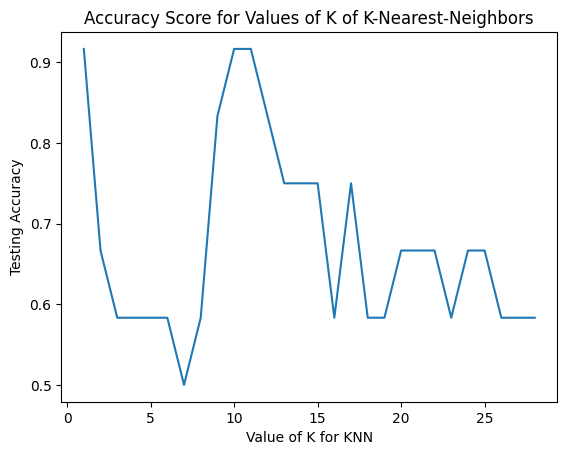

Highest accuracy: 0.9166666666666666
K value: 1


In [177]:
train_data_len = len(df.values) / 2
k_range = list(range(1, int(train_data_len) + 1))
scores = []

for k in k_range:
	knn = KNeighborsClassifier(n_neighbors=k)

	knn.fit(X_train, y_train)
	y_pred = knn.predict(X_test)
	scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")
plt.title("Accuracy Score for Values of K of K-Nearest-Neighbors")
plt.show()

highest_k = scores.index(max(scores)) + 1

print(f"Highest accuracy: {max(scores)}")
print(f"K value: {highest_k}")

In [197]:
knn = KNeighborsClassifier(n_neighbors=20)

7. Train the model using the `.fit()`

In [198]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

8. Test the model using the `.predict()`

In [199]:
y_pred = knn.predict(X_test)
print(X_test)
print(y_pred)

[[   1    1    1  573]
 [   0    0    0  865]
 [   1    1    1 3541]
 [   1    1    0  431]
 [   1    1    0 1239]
 [   0    0    0  267]
 [   0    0    0 1163]
 [   1    1    0  991]
 [   1    1    0 1030]
 [   1    1    0 2537]
 [   1    1    0 1027]
 [   0    1    0  445]]
[0 0 1 0 1 0 0 0 0 1 0 0]


***TEST SIR DATASET***

In [200]:
test = knn.predict([[0, 1, 0, 1000]])
print(f"Personality: {"Introvert" if test[0] == 0 else "Extrovert"}")

Personality: Introvert


## Evaluate the model

9. Create a confusion matrix

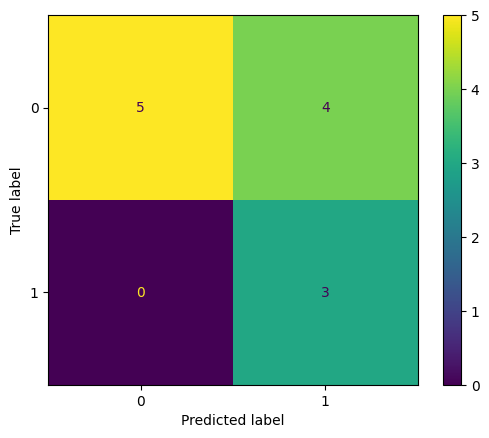

In [201]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)

disp.plot()

10. Display the accuracy

In [202]:
metrics.accuracy_score(y_test, y_pred)

0.6666666666666666

11. Display the precision

In [203]:
precision = precision_score(y_test, y_pred, average=None)
print(f"Precision: {precision}")

Precision: [0.55555556 1.        ]


12. Display the recall

In [204]:
recall = recall_score(y_test, y_pred, average=None)
print(f"Recall: {recall}")

Recall: [1.         0.42857143]


13. Display the f1-score

In [205]:
f1 = f1_score(y_test, y_pred, average=None)
print(f"F1: {f1}")

F1: [0.71428571 0.6       ]
